# Day022 : 特徵工程 簡介
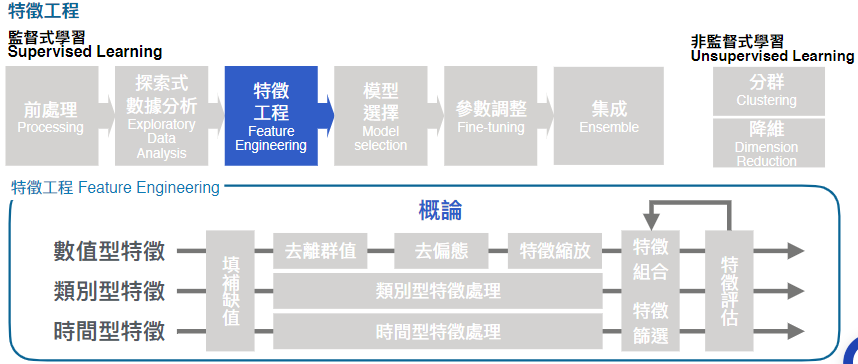

## [知識重點目標]
- 初步理解特徵工程的概念
- 能從程式中辨識特徵工程的區塊與意義
- 知道特徵工程至少需要哪些部分

甚麼是特徵工程?
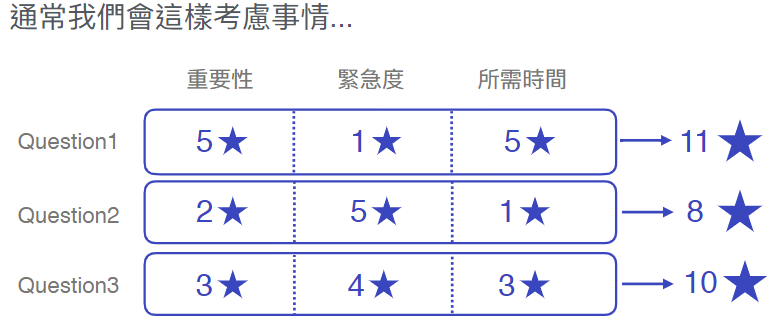

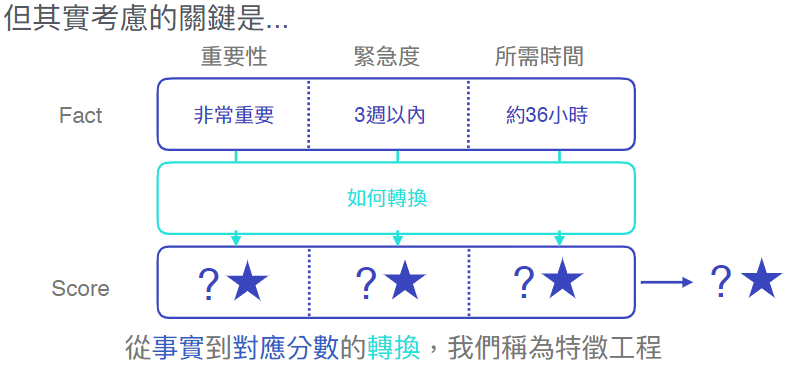

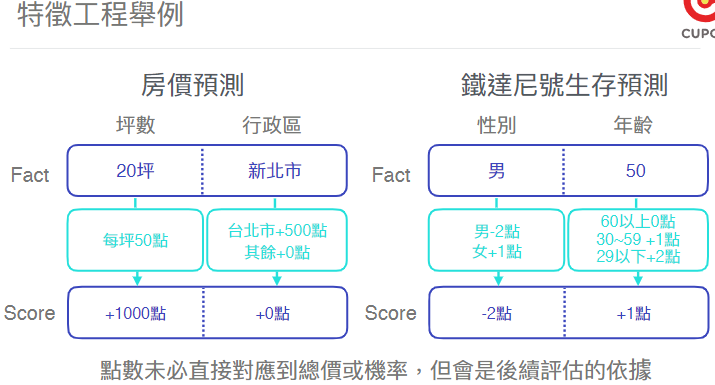

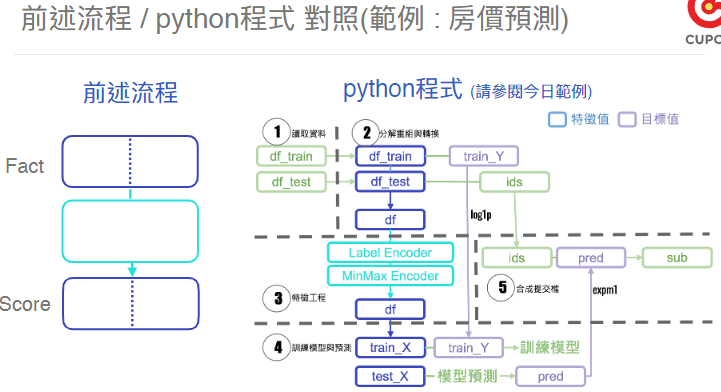

## [重要知識點複習]

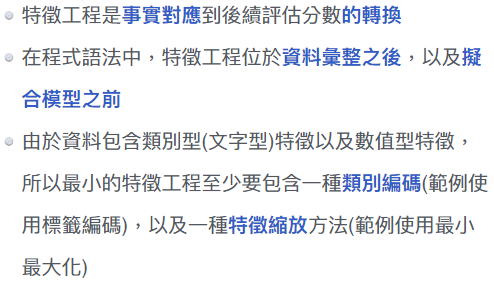

## [推薦延伸閱讀]
[知乎-特徵工程到底是什麼](https://www.zhihu.com/question/29316149)

本⽂重點為下圖，主要是希望同學大致知道特徵工程大致包含哪些部分，若對細節有興趣，還可以從這篇中了解一些概念其中⼀部分的內容，會在後面的課程中說明並練習，詳情請參閱百日馬拉松課綱。


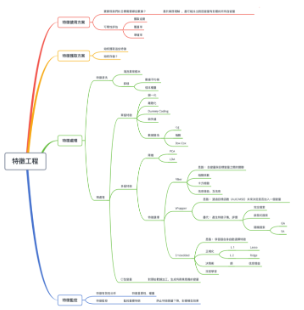

[痞客幫-iT邦2019鐵⼈人賽 : 為什麼特徵工程很重要](https://ithelp.ithome.com.tw/articles/10200041?sc=iThelpR)

本文主要在描述現實中資料科學工作的時間比重(下圖)，其中大部分的時間在於資料清理，少部分為特徵探勘，雖然這兩部份都是特徵工程，但在學習階段與實務階段，比重卻有著天壤之別。

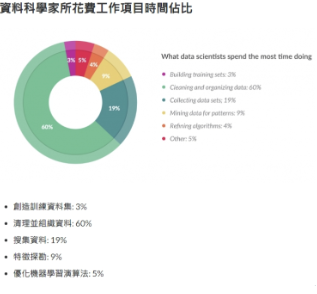

## [作業目標]
依照下列程式碼回答下列問題, 初步理解什麼是"特徵工程"的區塊

## [作業重點]
1. 下列A~E五個程式區塊中，哪一塊是特徵工程?

    Ans : C
    
    
2. 對照程式區塊 B 與 C 的結果，請問那些欄位屬於"類別型欄位"? (回答欄位英文名稱即可)

    Ans :
    Name, Sex, Ticket, Cabin, Embarked 等五個欄位

    註 : 像是 Pclass 這樣的欄位, 雖然就意義上而言是類別型欄位, 但因為裡面都是數值,
    因此 Python 讀取時會先將其判定為數值欄位, 希望同學了解語言判定與人為理解上的落差,
    因為 Python 不須宣告物件型別, 都是自動判定, 這點雖然方便, 卻也是初學者常常遇到的困難所在
    

3. 續上題，請問哪個欄位是"目標值"?

    Survived 是目標值

In [1]:
# 程式區塊 A
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')
df_train.shape

(891, 12)

In [2]:
# 程式區塊 B
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 程式區塊 C
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 w

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.118683,1.0,0.283951,0.125,0.0,0.775862,0.016072,0.000000,1.000000
1,0.0,0.218989,0.0,0.481481,0.125,0.0,0.879310,0.140813,0.575269,0.333333
2,1.0,0.400459,0.0,0.333333,0.000,0.0,0.984914,0.017387,0.000000,1.000000
3,0.0,0.323124,0.0,0.444444,0.125,0.0,0.070043,0.105390,0.381720,1.000000
4,1.0,0.016845,1.0,0.444444,0.000,0.0,0.699353,0.017630,0.000000,1.000000


In [4]:
# 程式區塊 D
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator.fit(train_X, train_Y)
pred = estimator.predict(test_X)

C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# 程式區塊 E
sub = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
sub.to_csv('titanic_baseline.csv', index=False) 

# Day023 : 數值型特徵-去除偏態
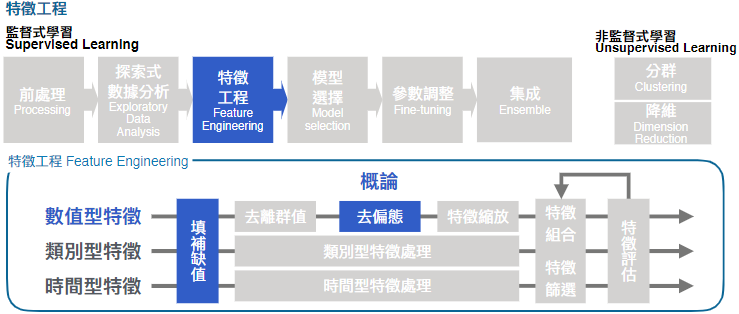

## [本日知識點目標]
1. 在哪些情況下，需要對資料去偏態
2. 去除偏態有哪幾種方式?
3. 使用 box-cox 去除偏態時，該注意什麼細節?

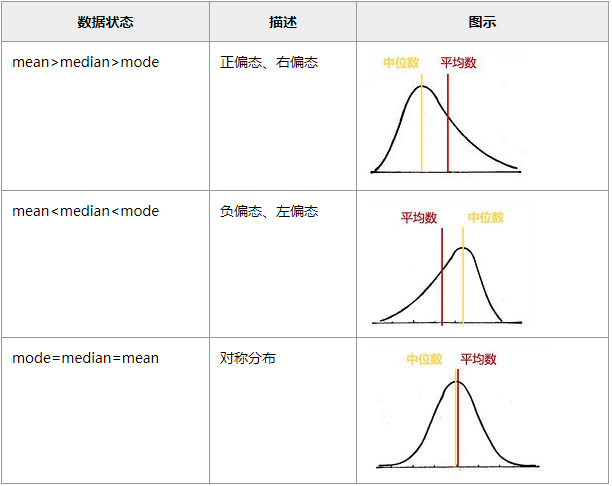

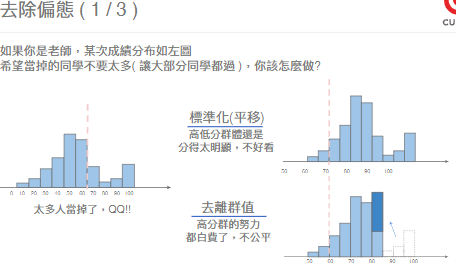

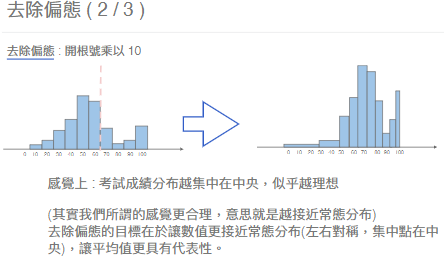

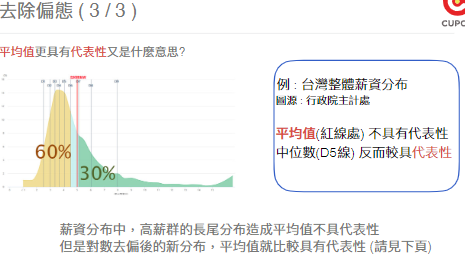

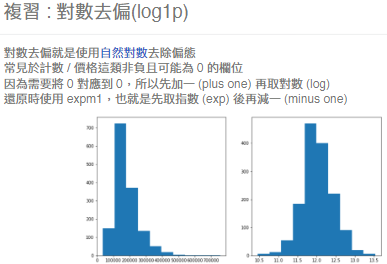

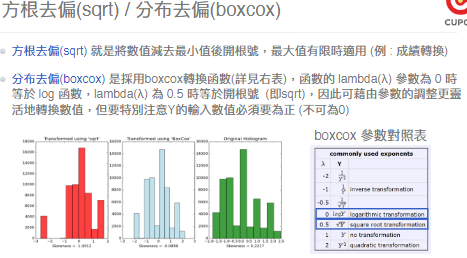

## [重點知識點複習]
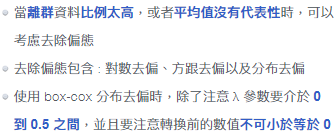

## [推薦延伸閱讀]

[機器學習數學|偏度與峰度及其 python 實現](https://blog.csdn.net/u013555719/article/details/78530879)

[数据分析之描述性统计](https://www.lizenghai.com/archives/25386.html)

本文提到了峰度與偏度的定義與統計上的意義之外，也提供了Python 上的實現，同學可以參參考一下這些圖片，而把其對應的程式碼當作工具參參

## [教學目標]
以下用房價預測資料，觀察降低資料偏態的影響

## [範例重點]

觀察原始數值的散佈圖, 以及線性迴歸分數 (Out[4], Out[5])

觀察使用log1p降偏態時, 對於分布與迴歸分數的影響 (In[6], Out[6])

觀察使用box-cox(λ=0.15)時, 對於分布與迴歸分數的影響 (In[7], Out[7])

觀察使用sqrt(box-cox, λ=0.5)時, 對於分布與迴歸分數的影響 (In[8], Out[8])

In [4]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

'''
訓練集的X: df_train ，訓練集的Y: train_Y
測試集的X: df_test
'''
train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


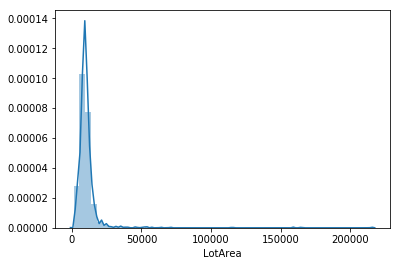

In [6]:
# 顯示 LotArea 的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['LotArea'][:train_num])
plt.show()

In [7]:
# 計算基礎分數

#  MinMaxScaler
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
# 線性回歸
estimator = LinearRegression()
# 交叉驗證，減少 overfitting
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8465251340743489

C:\Users\GGININDER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


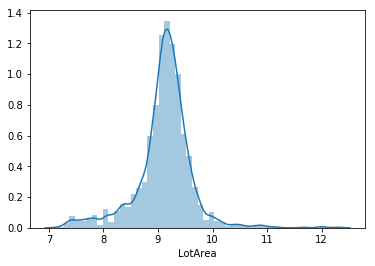

0.8522411133498679


C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
# 將 LotArea 取 log1p 後, 看散佈圖, 並計算分數
# copy.deepcopy()複製出的的物件就算改變內容也不會影響被複製的內容，但copy.copy()會。
df_fixed = copy.deepcopy(df)
# 使用自然對數去除偏態
df_fixed['LotArea'] = np.log1p(df_fixed['LotArea'])
sns.distplot(df_fixed['LotArea'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

C:\Users\GGININDER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


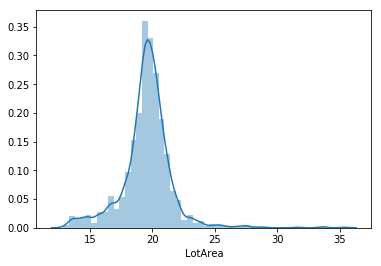

0.853332050698873


C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
# 將 LotArea 取 boxcox 後, 看散佈圖, 並計算分數
from scipy import stats
df_fixed = copy.deepcopy(df)
df_fixed['LotArea'] = stats.boxcox(df_fixed['LotArea'], lmbda=0.15)
sns.distplot(df_fixed['LotArea'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

C:\Users\GGININDER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


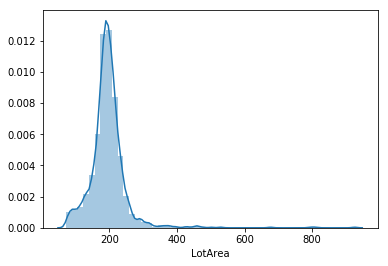

0.8497849374743864


C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
# 將 LotArea 取 sqrt (box-cox : alpha=0.5) 後, 看散佈圖, 並計算分數
df_fixed = copy.deepcopy(df)
df_fixed['LotArea'] = stats.boxcox(df['LotArea'], lmbda=0.5)
sns.distplot(df_fixed['LotArea'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

# Day024 : 類別型特徵 - 基礎處理

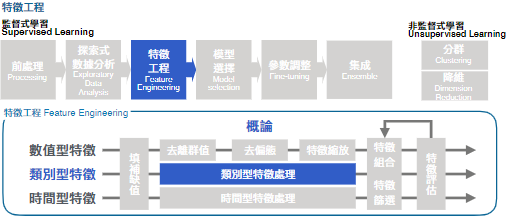

## [本日知識點目標]
1. 類別型特徵有哪兩種基礎編碼方式?
    
        Ans : 1. Label Encoding  2. One Hot Encoding
2. 兩種基礎編碼方式中，哪一種比較常用? 
3. 為什麼?在什麼情況下，比較適合獨熱編碼?

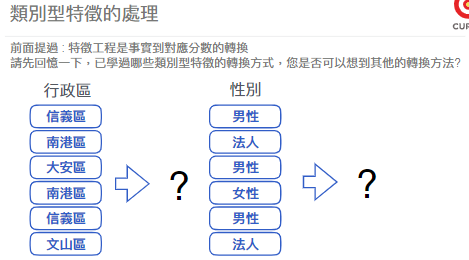

Label Encoding
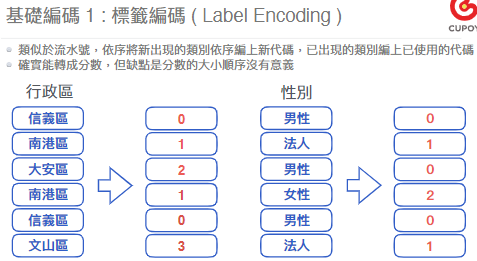

One hot Encoding
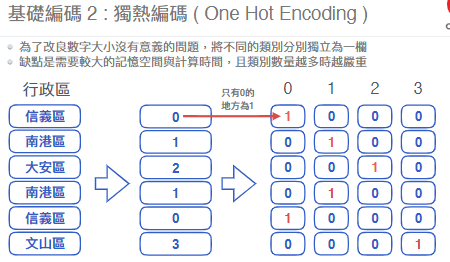

標籤編碼 / 獨熱編碼的比較
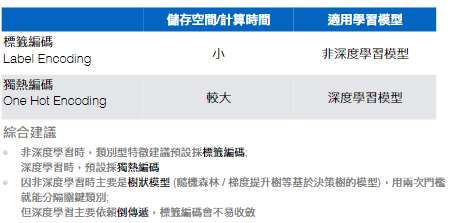

## [重點知識點複習]
1. 類別型特徵有標籤編碼 (Label Encoding) 與獨熱編碼(One Hot Encoding) 兩種基礎編碼方式
2. 兩種編碼中標籤編碼比較常用
3. 當特徵重要性高，且可能值較少時，才應該考慮獨熱編碼

## [延伸閱讀]
下列網站會教兩種的用法

[數據預處理理：獨熱編碼（One-Hot Encoding）和 LabelEncoder標籤編碼](https://www.twblogs.net/a/5baab6e32b7177781a0e6859/zh-cn/)

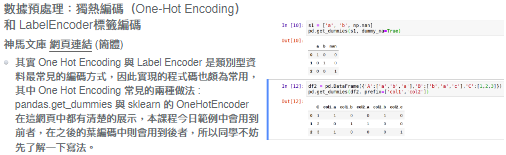

In [21]:
s1 = ['a', 'b', np.nan]
print(pd.get_dummies(s1, dummy_na=False))
print(pd.get_dummies(s1, dummy_na=True))

   a  b
0  1  0
1  0  1
2  0  0
   a  b  NaN
0  1  0    0
1  0  1    0
2  0  0    1


In [25]:
df2 = pd.DataFrame({'A':['a', 'b','a'], 'B':['b', 'a', 'c'], 'C':[1,2,3]})
pd.get_dummies(df2, prefix=['col1','col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [26]:
df2

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [27]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])
df

,0,1,2,3
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [30]:
df.columns = ['color', 'size', 'prize', 'class label']

In [31]:
df

,color,size,prize,class label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [32]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,prize,class label
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [33]:
class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}
df['class label'] = df['class label'].map(class_mapping)

In [34]:
df

,color,size,prize,class label
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


## [教學目標]
以下用房價預測資料, 觀查標籤編碼與獨編碼熱的影響

## [範例重點]
觀察標籤編碼與獨熱編碼, 在特徵數量 / 線性迴歸分數 / 線性迴歸時間上, 分別有什麼影響 (In[3], Out[3], In[4], Out[4]
觀察標籤編碼與獨熱編碼, 在特徵數量 / 梯度提升樹分數 / 梯度提升樹時間上, 分別有什麼影響 (In[5], Out[5], In[6], Out[6])

In [2]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
# 因為此篇只針對類別型特徵
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Object Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

43 Object Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [11]:
# 標籤編碼 + 線性迴歸
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
    
# df做完Label Encoder後，將訓練集分開
train_X = df_temp[:train_num]
estimator = LinearRegression()

start = time.time()

#df內只有train,test的輸入  目標值放在train_Y
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv = 5).mean()}')
print(f'time : {time.time()-start} sec')

shape : (1460, 43)
score : 0.6615606866851301
time : 0.07501673698425293 sec


In [13]:
# 獨熱編碼 + 線性迴歸
df_temp = pd.get_dummies(df)
train_X = df_temp[:train_num]
estimator = LinearRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv = 5).mean()}')
print(f'time : {time.time()-start} sec')

shape : (1460, 274)
score : -8.435980644307467e+22
time : 0.1090242862701416 sec


In [15]:
# 標籤編碼 + 梯度提升樹
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv = 5).mean()}')
print(f'time : {time.time()-start} sec')

shape : (1460, 43)
score : 0.7778219954026927
time : 0.6071362495422363 sec


In [16]:
# 獨熱編碼 + 梯度提升樹
df_temp = pd.get_dummies(df)
train_X = df_temp[:train_num]
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv = 5).mean()}')
print(f'time : {time.time()-start} sec')

shape : (1460, 274)
score : 0.7926907815016937
time : 2.1619069576263428 sec


# Day025 : 類別型特徵 - 均值編碼
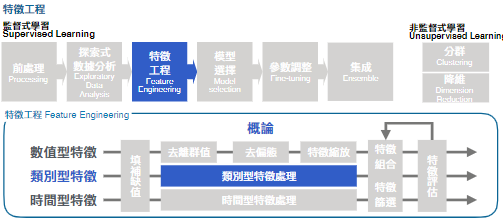

## [本日知識點目標]
1. 知道當「類別特徵」與目標明顯相關時，該用甚麼編碼方式?
2. 知道均值編碼可能有甚麼問題?
3. 知道應該使用何種方式修正均值編碼的問題?

均值編碼

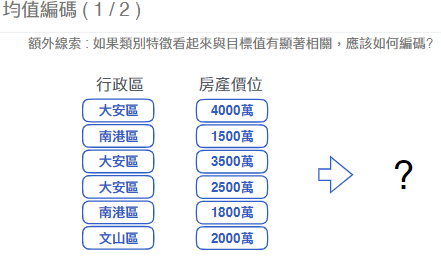

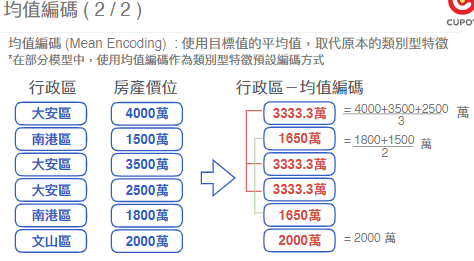

平滑化(smoothing)

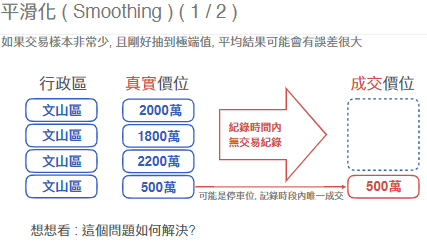

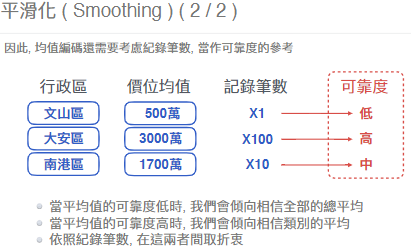

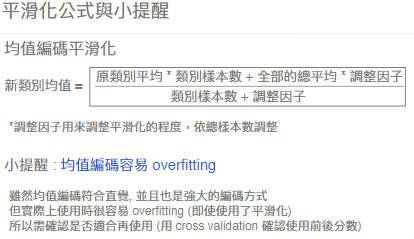

## [重要知識點複習]
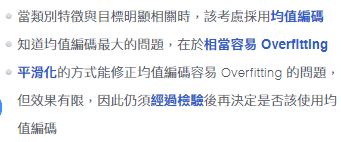

## [延伸閱讀]
[平均數編碼：針對高基數定性特徵(類別特徵)的數據處理/ 特徵工程](https://zhuanlan.zhihu.com/p/26308272)

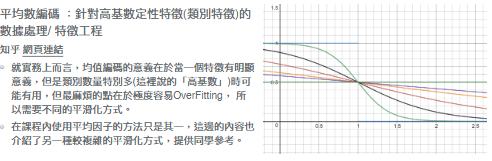

## [作業目標]

https://www.kaggle.com/c/titanic

試著模仿範例寫法, 在鐵達尼生存預測中, 觀察均值編碼的效果

## [作業重點]
- 仿造範例, 完成標籤編碼與均值編碼搭配邏輯斯迴歸的預測
- 觀察標籤編碼與均值編碼在特徵數量 / 邏輯斯迴歸分數 / 邏輯斯迴歸時間上, 分別有什麼影響

# Day026 : 

In [7]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = './data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test  = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'], axis=1)
df_test  = df_test.drop(['PassengerId'], axis=1)
df = pd.concat([df_train, df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_feature = []
for dtype, feature in zip(df.dtype, df.columns):
    if df.dtype == 'object':
        object_feature.append()